# 5.5 3D Pose Estimation

Module - Pose Estimation

For book, references and training materials, please check this project website [http://activefitness.ai/ai-in-sports-with-python](http://activefitness.ai/ai-in-sports-with-python).

Reference: Chapter 8, [Applied Machine Learning for Health and Fitness](https://www.apress.com/us/book/9781484257715)

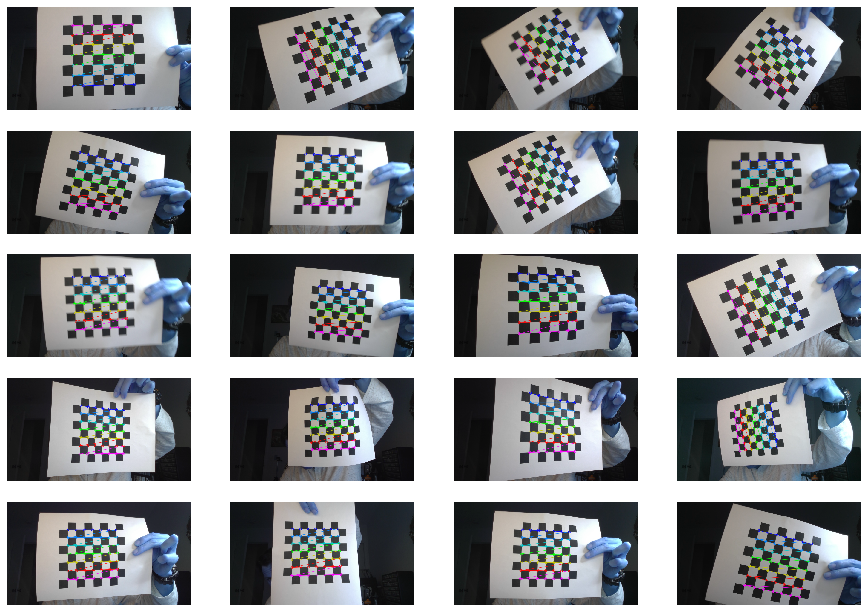

In [2]:
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from utils.pose3d import pose3d
%matplotlib inline

images = glob.glob('data/camera/chessboard3/*.jpg')
points_3d, points_2d = pose3d.find_corner_points(images)
img = cv2.imread(images[0])
# calibrate
_, M, D, R, T = cv2.calibrateCamera(points_3d, points_2d, (img.shape[1], img.shape[0]), None, None)
dist_pickle = {}
dist_pickle["mtx"] = M
dist_pickle["dist"] = D
# save calibration
pickle.dump(dist_pickle, open( "data/camera/calibration.pickle", "wb" ))                 

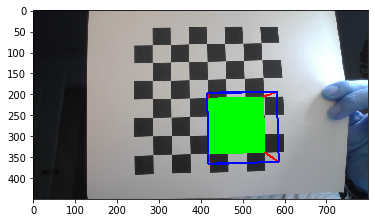

In [3]:
img = pose3d.find_3d_cube(images[0],M,D)
plt.imshow(img)
plt.show()                          
                            

## Weightlifting

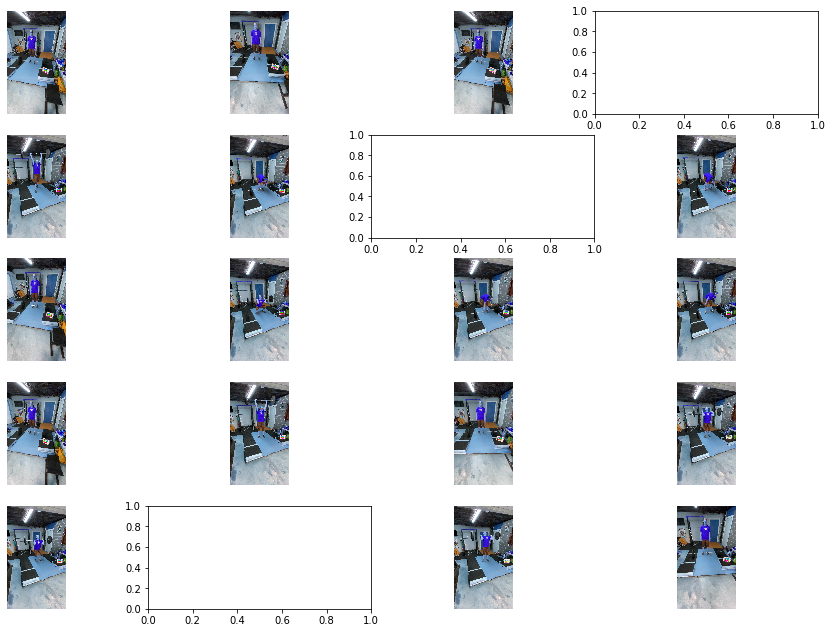

In [2]:
import cv2
import pickle
import glob
import matplotlib.pyplot as plt
from utils.pose3d import pose3d
%matplotlib inline

images = glob.glob('data/weightlifting/*.jpg')
points_3d, points_2d = pose3d.find_corner_points(images)
img = cv2.imread(images[0])
# calibrate
_, M, D, R, T = cv2.calibrateCamera(points_3d, points_2d, (img.shape[1], img.shape[0]), None, None)
dist_pickle = {}
dist_pickle["mtx"] = M
dist_pickle["dist"] = D
# save calibration
pickle.dump(dist_pickle, open( "data/weightlifting/calibration.pickle", "wb" ))

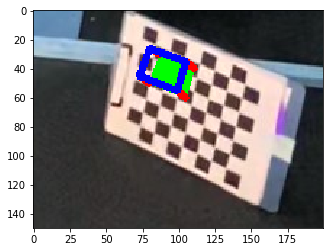

In [3]:
y = 1050
h = 150
x = 600
w = 200

img = pose3d.find_3d_cube(images[0],M,D)
crop_img = img[y:y+h, x:x+w]
plt.imshow(crop_img)
plt.show()  

## Sparse and Dense Pose

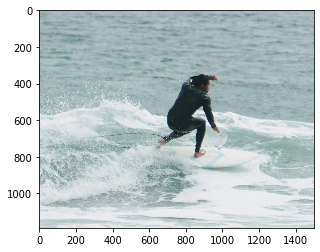

In [1]:
from torchvision import models
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as T
%matplotlib inline

img = Image.open('./media/surfer.jpg')
plt.imshow(img); plt.show()

def normalize(img):
    normalize_t = T.Compose([T.Resize(256),
                     T.CenterCrop(224),
                     T.ToTensor(), 
                     T.Normalize(mean = [0.485, 0.456, 0.406], 
                                 std = [0.229, 0.224, 0.225])])
    return normalize_t(img).unsqueeze(0)

img_tensor = normalize(img)

kprcnn = models.detection.keypointrcnn_resnet50_fpn(pretrained=True)
kprcnn.eval()
detection = kprcnn(img_tensor)[0]

In [2]:
import torch
import utils.pose3dn.lib
from utils.pose3dn.lib.utils.eval import get_preds, get_preds_3d
from utils.pose3dn.joints import get_keypoint_detections, to_json

keypoint_detections = get_keypoint_detections(img)
json_keypoints = to_json(keypoint_detections)
json_keypoints

'[{"nose": [925, 418, 1], "left_eye": [924, 406, 1], "right_eye": [919, 408, 1], "left_ear": [887, 408, 1], "right_ear": [893, 409, 1], "left_shoulder": [801, 417, 1], "right_shoulder": [907, 476, 1], "left_elbow": [838, 375, 1], "right_elbow": [925, 566, 1], "left_wrist": [910, 366, 1], "right_wrist": [951, 632, 1], "left_hip": [713, 590, 1], "right_hip": [774, 626, 1], "left_knee": [774, 663, 1], "right_knee": [887, 614, 1], "left_ankle": [686, 709, 1], "right_ankle": [863, 766, 1]}]'

In [ ]:
!python2 tools/infer_simple.py --cfg configs/DensePose_ResNet101_FPN_s1x-e2e.yaml --output-dir DensePoseData/infer_out/ --image-ext jpg --wts https://dl.fbaipublicfiles.com/densepose/DensePose_ResNet101_FPN_s1x-e2e.pkl DensePoseData/demo_data/surf4.jpg

In [ ]:
fig = plt.figure(figsize=[30,30])
plt.imshow(   np.hstack((IUV[:,:,0]/24. ,IUV[:,:,1]/256. ,IUV[:,:,2]/256.))  )
plt.axis('off') ; 
plt.show()

In [ ]:
fig = plt.figure(figsize=\[30,30\])
plt.imshow( im\[:,:,::-1\] )
plt.contour( INDS, linewidths = 4 )
plt.show()